In [56]:
num_unique_sources = df['source'].nunique()

print(f"Number of distinct news sources: {num_unique_sources}")

Number of distinct news sources: 98


In [58]:
source_counts = df['source'].value_counts()
print("Top 10 Most Prolific News Sources:")
print(source_counts.head(10).to_markdown(numalign="left", stralign="left"))

Top 10 Most Prolific News Sources:
| source                                           | count   |
|:-------------------------------------------------|:--------|
| The Daily Galaxy                                 | 13      |
| The New York Times                               | 11      |
| Space                                            | 8       |
| BBC                                              | 7       |
| Forbes                                           | 5       |
| ScienceAlert                                     | 5       |
| NPR                                              | 5       |
| Yahoo                                            | 5       |
| ABC News - Breaking News, Latest News and Videos | 5       |
| Politico                                         | 4       |


In [60]:
from urllib.parse import urlparse

def extract_domain(url):
    try:
        return urlparse(url).netloc
    except:
        return None

df['domain'] = df['sourceUrl'].apply(extract_domain)
domain_counts = df['domain'].value_counts()
print("Top 10 Most Frequent Domains:")
print(domain_counts.head(10).to_markdown(numalign="left", stralign="left"))

Top 10 Most Frequent Domains:
| domain               | count   |
|:---------------------|:--------|
| dailygalaxy.com      | 13      |
| www.nytimes.com      | 11      |
| www.space.com        | 8       |
| www.bbc.com          | 7       |
| www.forbes.com       | 5       |
| www.sciencealert.com | 5       |
| www.npr.org          | 5       |
| www.yahoo.com        | 5       |
| abcnews.go.com       | 5       |
| www.politico.com     | 4       |


In [62]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

df['day_of_week'] = df['publishedAt'].dt.day_name()
print("\nPublication Frequency by Day of Week:")
print(df['day_of_week'].value_counts().to_markdown(numalign="left", stralign="left"))

df['hour_of_day'] = df['publishedAt'].dt.hour
print("\nPublication Frequency by Hour of Day:")
print(df['hour_of_day'].value_counts().sort_index().to_markdown(numalign="left", stralign="left"))


Publication Frequency by Day of Week:
| day_of_week   | count   |
|:--------------|:--------|
| Thursday      | 99      |
| Wednesday     | 87      |
| Tuesday       | 9       |

Publication Frequency by Hour of Day:
| hour_of_day   | count   |
|:--------------|:--------|
| 0             | 7       |
| 1             | 4       |
| 2             | 5       |
| 3             | 4       |
| 4             | 4       |
| 5             | 2       |
| 6             | 1       |
| 7             | 6       |
| 8             | 5       |
| 9             | 15      |
| 10            | 14      |
| 11            | 11      |
| 12            | 14      |
| 13            | 16      |
| 14            | 13      |
| 15            | 18      |
| 16            | 10      |
| 17            | 13      |
| 18            | 7       |
| 19            | 7       |
| 20            | 3       |
| 21            | 9       |
| 22            | 3       |
| 23            | 4       |


In [64]:
df['word_count'] = df['title'].apply(lambda x: len(x.split()))

title_length_stats = df['word_count'].describe()

print("Statistical Distribution of News Title Lengths (Word Count):")
print(title_length_stats.to_markdown(numalign="left", stralign="left"))

Statistical Distribution of News Title Lengths (Word Count):
|       | word_count   |
|:------|:-------------|
| count | 195          |
| mean  | 12.6769      |
| std   | 3.68239      |
| min   | 3            |
| 25%   | 10           |
| 50%   | 12           |
| 75%   | 15           |
| max   | 29           |


In [66]:
avg_title_length_by_source = df.groupby('source')['word_count'].mean().sort_values(ascending=False)
print(avg_title_length_by_source.head(10).to_markdown(numalign="left", stralign="left"))
avg_title_length_by_day = df.groupby('day_of_week')['word_count'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("\nAverage Title Length by Day of Week:")
print(avg_title_length_by_day.to_markdown(numalign="left", stralign="left"))

| source            | word_count   |
|:------------------|:-------------|
| Wccftech          | 29           |
| Hindustan Times   | 23           |
| Daily Mail        | 22           |
| The Independent   | 19           |
| Android Authority | 19           |
| Cageside Seats    | 18           |
| RPG Site          | 18           |
| Rude Baguette     | 18           |
| Times of India    | 18           |
| The Conversation  | 17           |

Average Title Length by Day of Week:
| day_of_week   | word_count   |
|:--------------|:-------------|
| Monday        | nan          |
| Tuesday       | 12           |
| Wednesday     | 12.9425      |
| Thursday      | 12.5051      |
| Friday        | nan          |
| Saturday      | nan          |
| Sunday        | nan          |


In [68]:
from collections import Counter
import re
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()
df['cleaned_title'] = df['title'].apply(clean_text)
all_words = ' '.join(df['cleaned_title']).split()
word_freq = Counter(all_words)
print("\nTop 20 Most Frequent Words in News Titles (including common words):")
print(word_freq.most_common(20))


Top 20 Most Frequent Words in News Titles (including common words):
[('the', 77), ('to', 59), ('in', 53), ('a', 42), ('of', 40), ('and', 29), ('for', 29), ('on', 23), ('is', 21), ('new', 17), ('are', 15), ('with', 15), ('trump', 14), ('iran', 13), ('us', 13), ('that', 12), ('from', 11), ('scientists', 10), ('as', 10), ('this', 10)]


In [70]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()
df['cleaned_title'] = df['title'].apply(clean_text)
sources_to_analyze = ['The Daily Galaxy', 'The New York Times', 'NPR', 'ScienceAlert', 'Politico']

print("\nSource-Specific Content Patterns (Most Frequent Words):")

for source_name in sources_to_analyze:
    source_df = df[df['source'] == source_name]

    if not source_df.empty:
        # Combine all cleaned titles for this source into a single string
        all_words_source = ' '.join(source_df['cleaned_title']).split()
        word_freq_source = Counter(all_words_source)

        print(f"\n--- Top 10 words for '{source_name}': ---")
        print(word_freq_source.most_common(10))
    else:
        print(f"\nNo articles found for '{source_name}'.")


Source-Specific Content Patterns (Most Frequent Words):

--- Top 10 words for 'The Daily Galaxy': ---
[('the', 13), ('a', 5), ('are', 3), ('on', 3), ('of', 3), ('reveals', 3), ('is', 2), ('in', 2), ('scientists', 2), ('our', 2)]

--- Top 10 words for 'The New York Times': ---
[('the', 7), ('a', 4), ('to', 3), ('in', 3), ('trump', 2), ('is', 2), ('war', 2), ('russian', 2), ('with', 2), ('no', 2)]

--- Top 10 words for 'NPR': ---
[('israel', 1), ('vows', 1), ('to', 1), ('intensify', 1), ('attacks', 1), ('after', 1), ('iranian', 1), ('missile', 1), ('hits', 1), ('major', 1)]

--- Top 10 words for 'ScienceAlert': ---
[('a', 3), ('to', 3), ('human', 2), ('as', 2), ('s', 1), ('dragon', 1), ('man', 1), ('finally', 1), ('gives', 1), ('elusive', 1)]

--- Top 10 words for 'Politico': ---
[('trump', 2), ('on', 2), ('iran', 2), ('weak', 1), ('whiny', 1), ('and', 1), ('invisible', 1), ('critics', 1), ('of', 1), ('dnc', 1)]


Daily publication volume chart saved as 'daily_publication_volume.png'


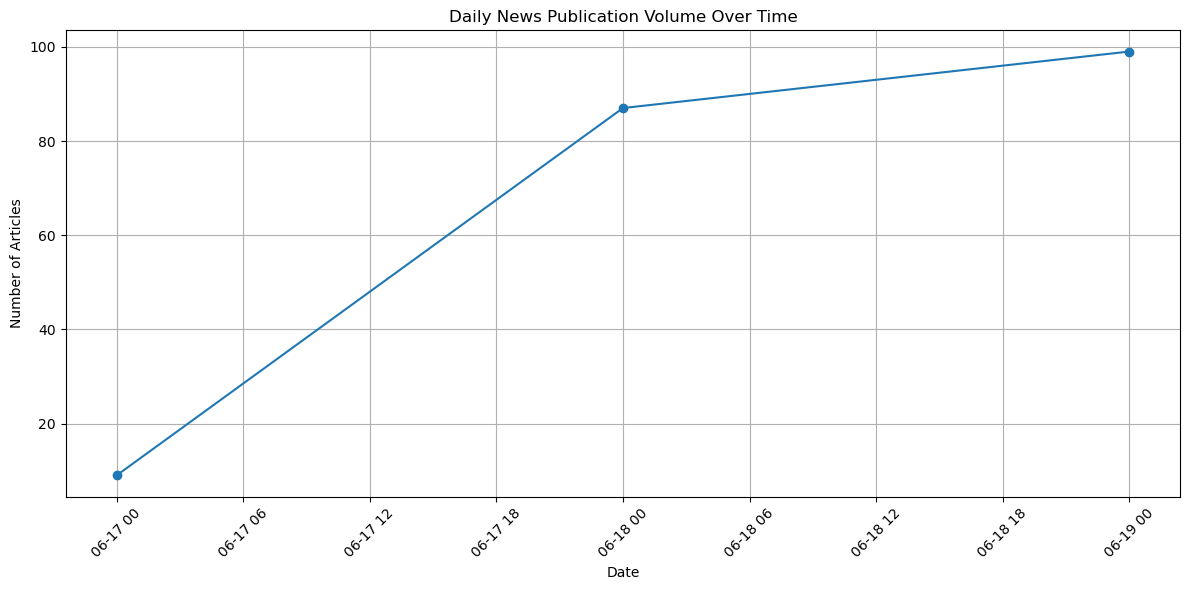

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

df['publishedAt'] = pd.to_datetime(df['publishedAt'])
daily_counts = df.groupby(df['publishedAt'].dt.date).size()
daily_counts.index = pd.to_datetime(daily_counts.index)

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.title('Daily News Publication Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_publication_volume.png')

print("Daily publication volume chart saved as 'daily_publication_volume.png'")

In [78]:
from collections import Counter
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()
df['cleaned_title'] = df['title'].apply(clean_text)

all_words_overall = ' '.join(df['cleaned_title']).split()
word_freq_overall = Counter(all_words_overall)

sources_to_analyze = ['The Daily Galaxy', 'The New York Times', 'NPR', 'ScienceAlert', 'Politico']

print("\n--- Unique Keyword Identification per Source: ---")

for source_name in sources_to_analyze:
    source_df = df[df['source'] == source_name]

    if not source_df.empty:
        all_words_source = ' '.join(source_df['cleaned_title']).split()
        word_freq_source = Counter(all_words_source)
        
        unique_words_score = {}
        for word, freq in word_freq_source.items():
            if word: # Ensure word is not an empty string
                overall_freq = word_freq_overall.get(word, 0)
                score = freq / (overall_freq + 1)
                unique_words_score[word] = score

        most_unique_words = sorted(unique_words_score.items(), key=lambda item: item[1], reverse=True)[:10]

        print(f"\n--- Top 10 'Unique' Keywords for '{source_name}': ---")
        for word, score in most_unique_words:
            print(f"- '{word}' (Source Freq: {word_freq_source[word]}, Overall Freq: {word_freq_overall[word]}, Score: {score:.2f})")
    else:
        print(f"\nNo articles found for '{source_name}'.")


--- Unique Keyword Identification per Source: ---

--- Top 10 'Unique' Keywords for 'The Daily Galaxy': ---
- 'reveals' (Source Freq: 3, Overall Freq: 3, Score: 0.75)
- 'mysterious' (Source Freq: 2, Overall Freq: 2, Score: 0.67)
- 'tiny' (Source Freq: 2, Overall Freq: 2, Score: 0.67)
- 'global' (Source Freq: 1, Overall Freq: 1, Score: 0.50)
- 'innovation' (Source Freq: 1, Overall Freq: 1, Score: 0.50)
- 'breaking' (Source Freq: 1, Overall Freq: 1, Score: 0.50)
- 'powerful' (Source Freq: 1, Overall Freq: 1, Score: 0.50)
- 'electron' (Source Freq: 1, Overall Freq: 1, Score: 0.50)
- 'beam' (Source Freq: 1, Overall Freq: 1, Score: 0.50)
- 'spiders' (Source Freq: 1, Overall Freq: 1, Score: 0.50)

--- Top 10 'Unique' Keywords for 'The New York Times': ---
- 'russian' (Source Freq: 2, Overall Freq: 2, Score: 0.67)
- 'chiles' (Source Freq: 1, Overall Freq: 1, Score: 0.50)
- 'vera' (Source Freq: 1, Overall Freq: 1, Score: 0.50)
- 'rubin' (Source Freq: 1, Overall Freq: 1, Score: 0.50)
- 'observ

In [80]:
import pandas as pd

missing_image_df = df[df['image'].isnull()]
missing_image_by_source = missing_image_df['source'].value_counts()
missing_image_by_day = missing_image_df['day_of_week'].value_counts()

print("\n--- Analysis of Missing Image Data ---")

if not missing_image_df.empty:
    print(f"Total entries with missing image URLs: {len(missing_image_df)}")

    print("\nSources with Missing Image URLs:")
    print(missing_image_by_source.to_markdown(numalign="left", stralign="left"))

    print("\nDays of Week with Missing Image URLs:")
    print(missing_image_by_day.to_markdown(numalign="left", stralign="left"))
else:
    print("No missing image URLs found in the dataset.")


--- Analysis of Missing Image Data ---
Total entries with missing image URLs: 16

Sources with Missing Image URLs:
| source               | count   |
|:---------------------|:--------|
| Politico             | 4       |
| Axios                | 3       |
| The New York Times   | 3       |
| Barron's             | 3       |
| Farmingdale Observer | 1       |
| Rocket League        | 1       |
| Al Arabiya English   | 1       |

Days of Week with Missing Image URLs:
| day_of_week   | count   |
|:--------------|:--------|
| Thursday      | 11      |
| Wednesday     | 4       |
| Tuesday       | 1       |
